In [1]:
# Import necessary Libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading baseball.csv file
data = pd.read_csv('baseball[1].csv')
#Looking into top 5 rows
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
#Looking for  max rows
pd.set_option('display.max.rows', None)

In [4]:
# Check Column name:
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

We can see that the column names of above data are difficult to understand, we need to elaborate these column name to make it easy to understand

W =Number of predicted wins (W)
R = Runs
AB=At Bats
H=Hits
2B=Doubles
3B=Triples
HR=Homeruns
BB=Walks
SO=Strikeouts
SB= Stolen Bases
RA=Runs Allowed
ER=Earned Runs
ERA=Earned Run Average (ERA)
CG=ShutoutsComplete Games
SHO=Shutouts
SV=Saves
E=Errors

In [5]:
#Changning Column names to make it easy to understand the parameters
data.columns=['Win','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)','Complete Games', 'Shutouts', 'Saves', 'Errors']
# After Changing Columns names
data.head()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
# Checking  total number columns and rows
data.shape

(30, 17)

we see that there is 30 rows and 17 columns in our dataset

###### Identifing the type of Problem

Output: Number of predicted wins (W)

In [7]:
#Checking the datatype of each variables
data.dtypes

Win                           int64
Runs                          int64
At Bats                       int64
Hits                          int64
Doubles                       int64
Triples                       int64
Homeruns                      int64
Walks                         int64
Strikeouts                    int64
Stolen Bases                  int64
Runs Allowed                  int64
Earned Runs                   int64
Earned Run Average (ERA)    float64
Complete Games                int64
Shutouts                      int64
Saves                         int64
Errors                        int64
dtype: object

As per problem statement Target variable i.e. W is int64 i.e. continuous value so we'll use Regression to learn our model.

In [8]:
# Checking null value of each variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Win                       30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

#we can see that there is no null values

In [9]:
# Checking sum of  missing values of each variables
data.isna().sum()

Win                         0
Runs                        0
At Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

we can see that there is no missing values

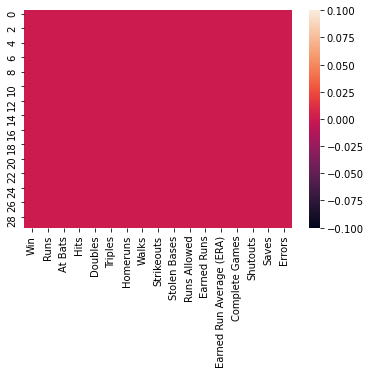

In [10]:
# Checking missing value throw heatmap
sns.heatmap(data.isna())
plt.show()

 we see throw visualization there is no missing value in any variable

In [11]:
#Checking Statistics summary of dataset
data.describe()

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Few columns have very low values in it, where few have very high values. Hence Scaling will be required to train our model.

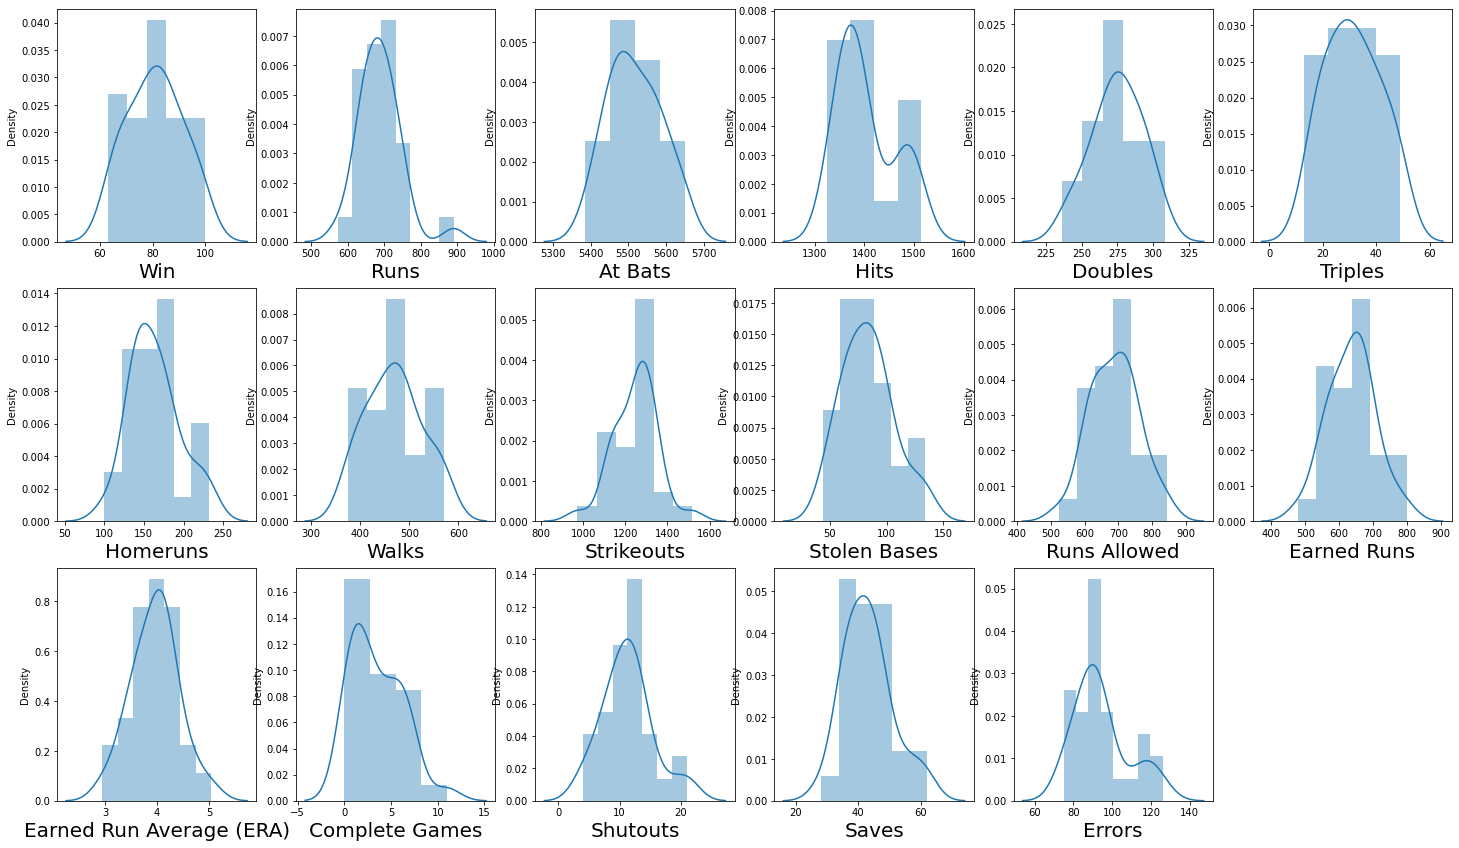

In [12]:
# let's see how data is distributed for every column
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=30 :     # as there are 30 columns in the data
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Here we can see almost all the data is Normalized and there is no much outliers present in the dataset

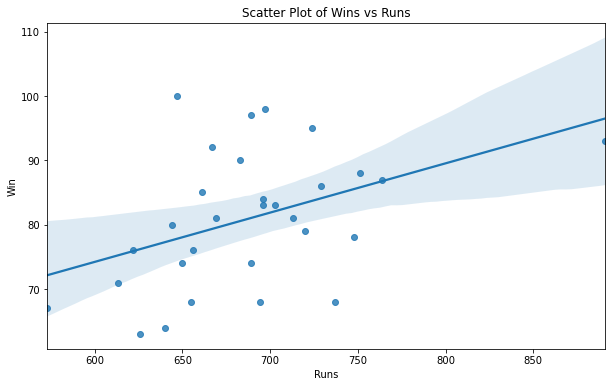

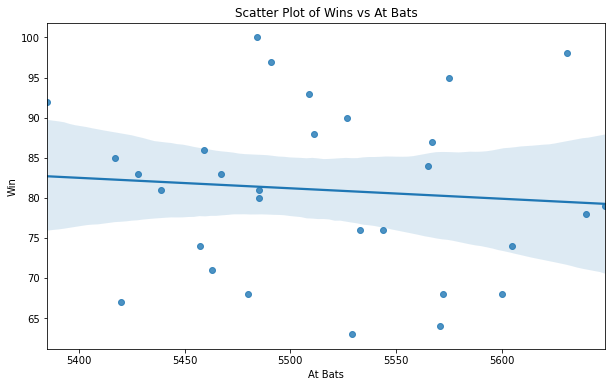

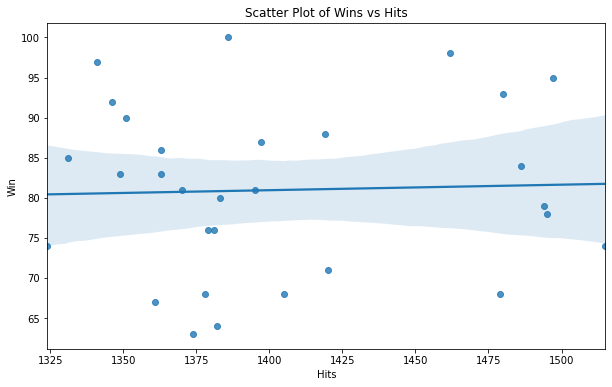

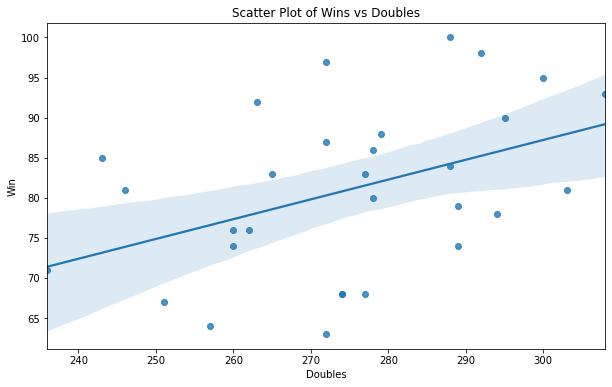

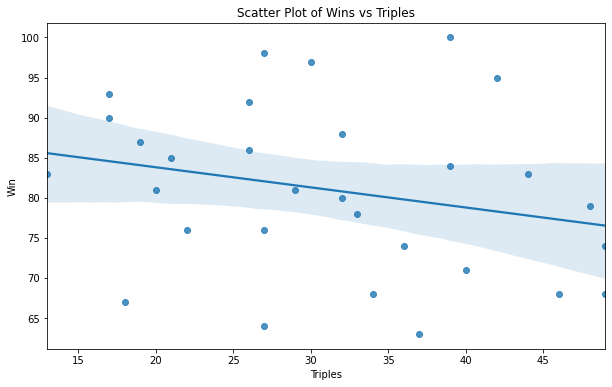

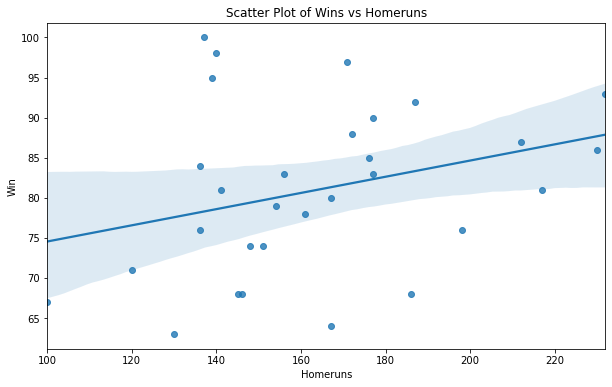

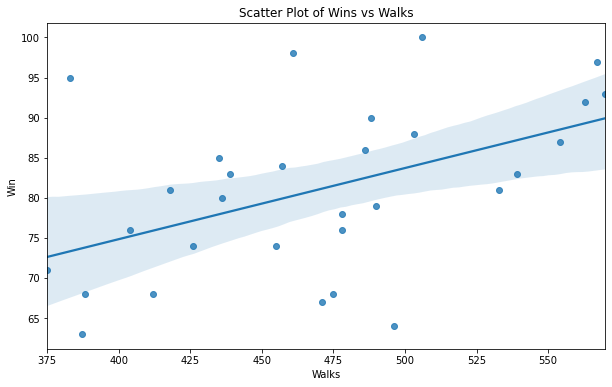

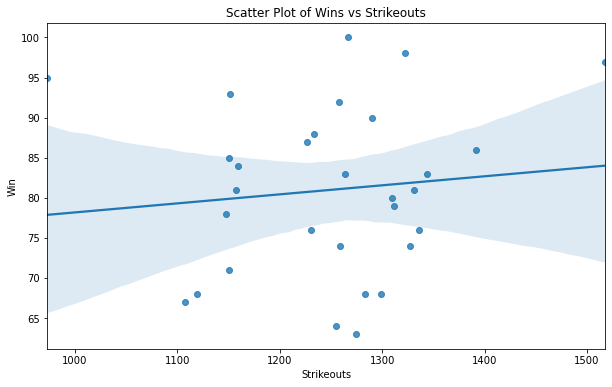

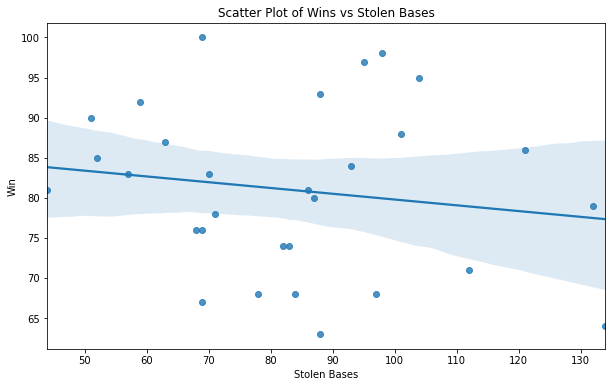

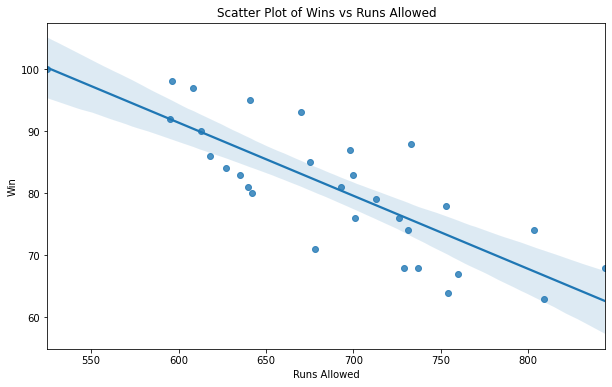

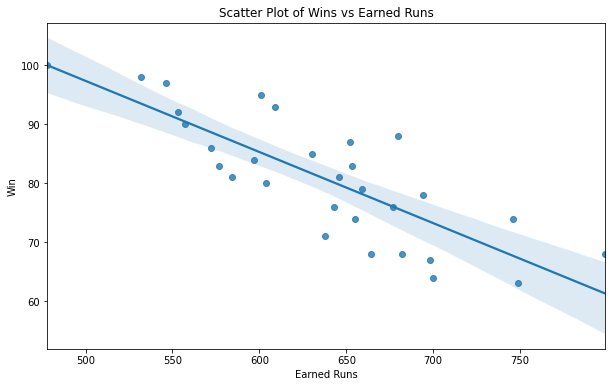

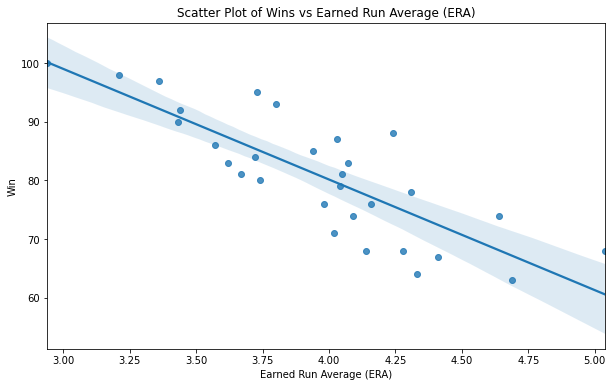

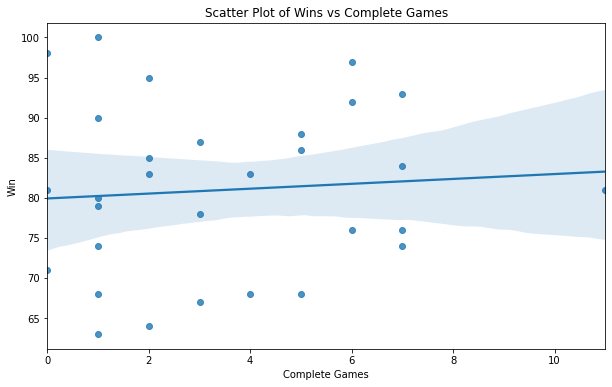

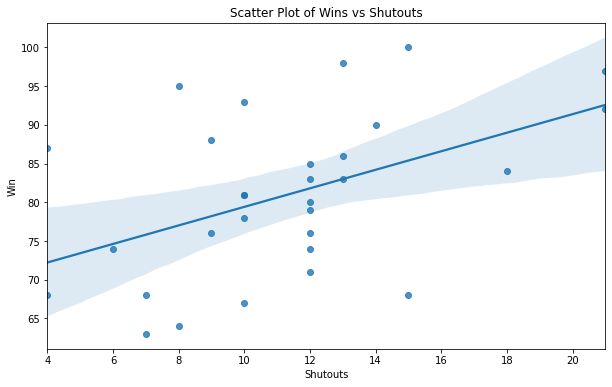

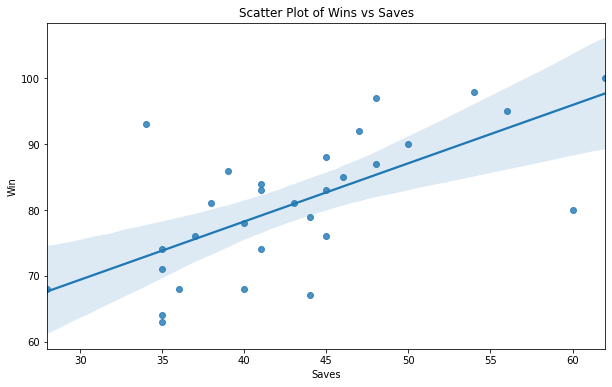

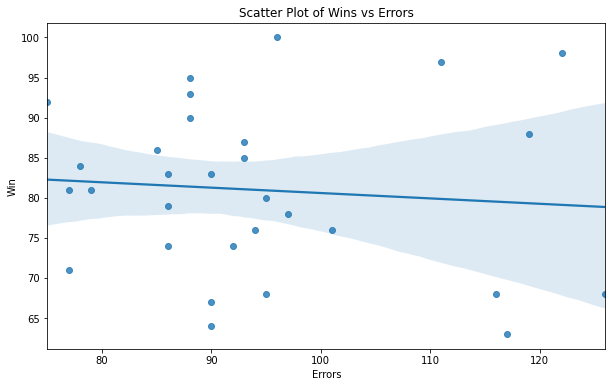

In [13]:
collist=data.columns.values
for i in range(1,len(collist)):
    plt.figure(figsize = (10,6))
    sns.regplot(data[collist[i]], data['Win'])
    plt.title('Scatter Plot of Wins vs %s' %(collist[i]))
    plt.xlabel(collist[i])
    plt.ylabel('Win')
    plt.show()

In [14]:
#1. RA, ER, ERA have good relation with Win.
#2. Rest all the Columns does not good Relation with Win because data is scatter across all the places.

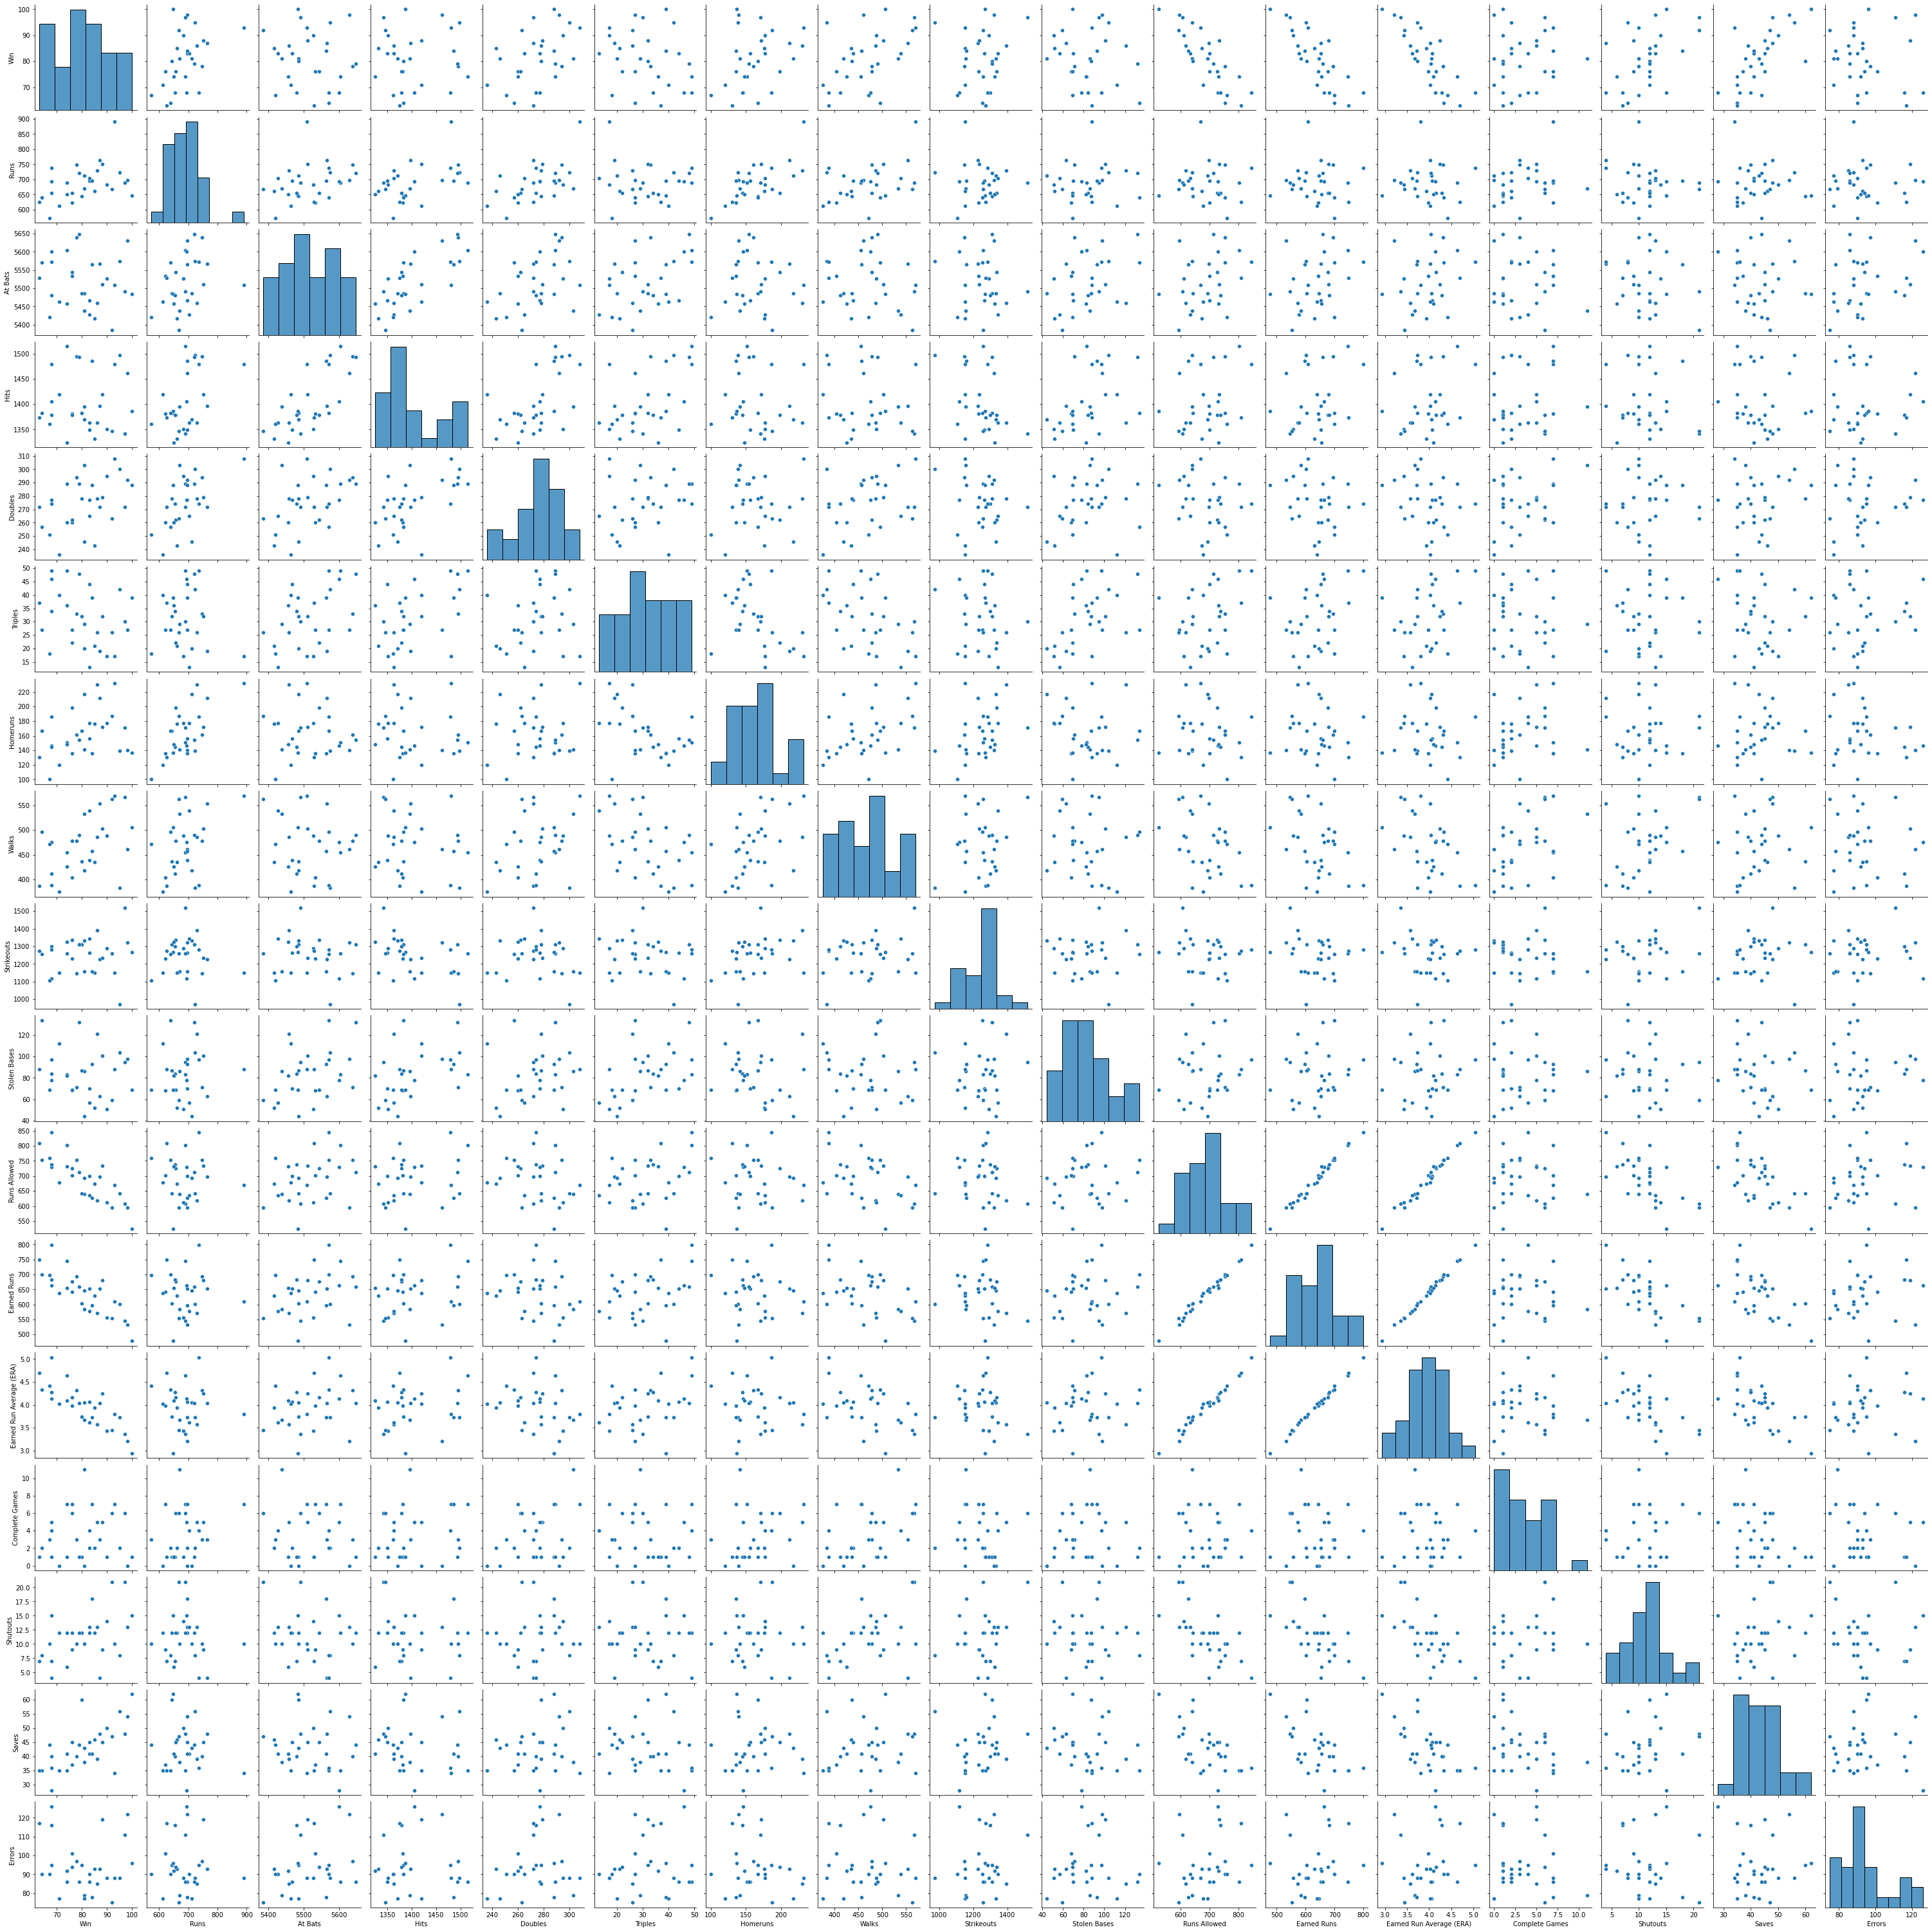

In [15]:
#Drawing Pairplot
sns.pairplot(data)
plt.show()

we Can not Judge anything because plot is too small, we will draw Heatmap for better understanding.

In [16]:
# Checking correlation in dataset
cor = data.corr()
cor

,Win,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
Win,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [17]:
# we can understanding properly as we use heatmap to find correleation

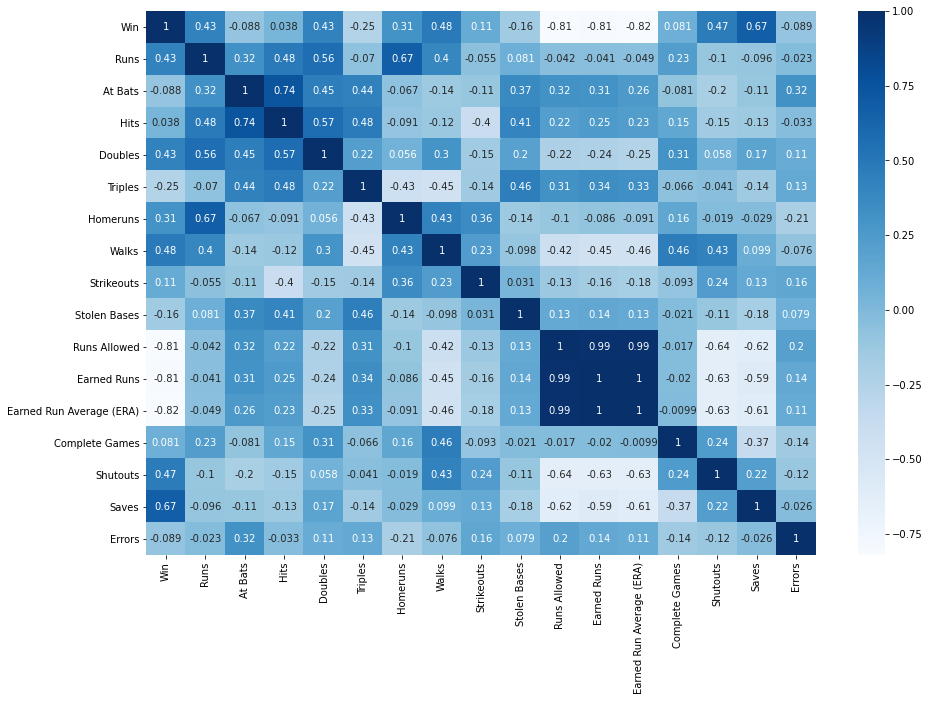

In [18]:
#Checking correlation using Heat Map to get high and low correlated parameteres
plt.figure(figsize=(15,10))
sns.heatmap(cor,cmap='Blues',annot=True)
plt.show()

We can see highly correlated values with respect to wins and other variables

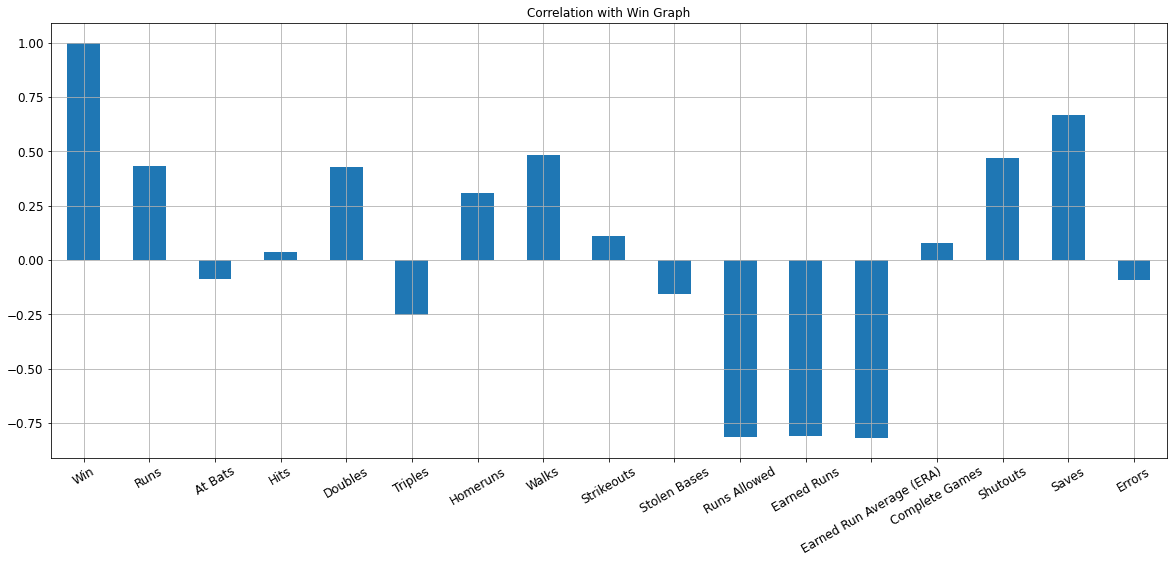

In [19]:
#Correlation with Win with respect to attributes
data.corrwith(data.Win).plot.bar(
        figsize = (20, 8), title = "Correlation with Win Graph", fontsize = 12,rot = 30, grid = True)
plt.show()

As we observed that: 1)Runs, Doubles, walks,homeruns,shutouts, saves are positvely correlated 
                    2)Hits, strikeouts, completegames are least correlated to wins. 
                    2)ERA, Runs allowed, earned runs,stolen bases,triples,errors,atbats are negatively correlated to wins.

<Figure size 1440x360 with 0 Axes>

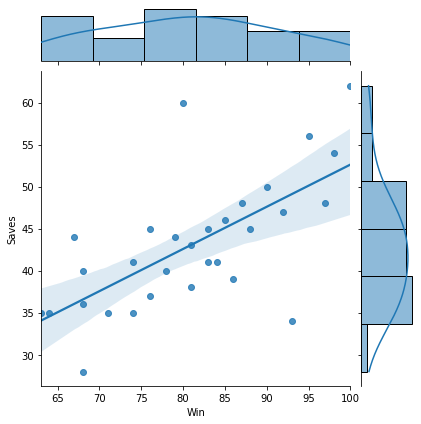

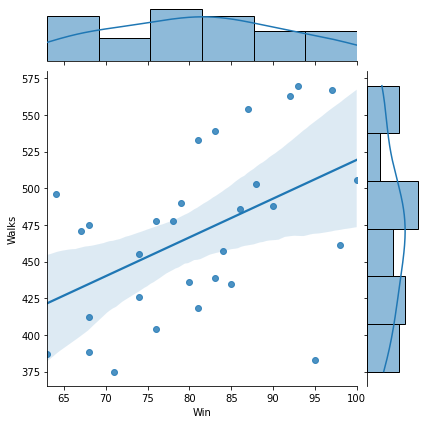

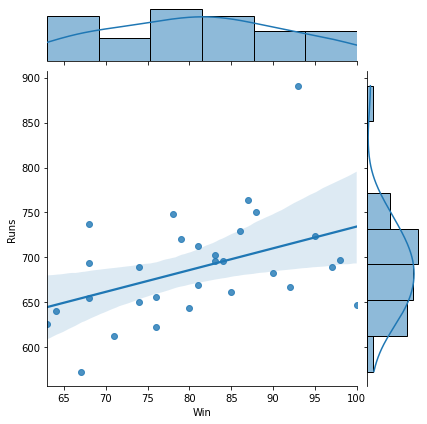

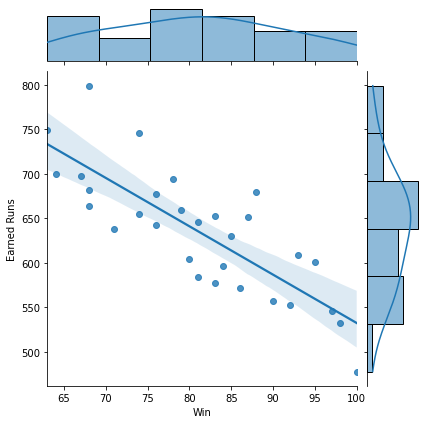

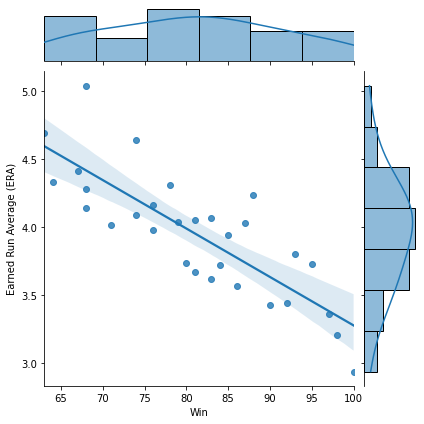

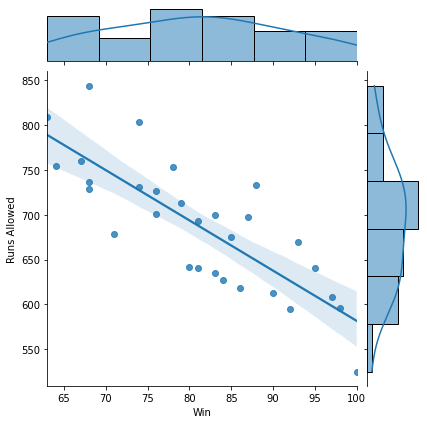

In [20]:
plt.figure(figsize=(20, 5))

_ = sns.jointplot(data=data, x='Win', y='Saves', kind='reg')
_ = sns.jointplot(data=data, x='Win', y='Walks', kind='reg')
_ = sns.jointplot(data=data, x='Win', y='Runs', kind='reg')
_ = sns.jointplot(data=data, x='Win', y='Earned Runs', kind='reg')
_ = sns.jointplot(data=data, x='Win', y='Earned Run Average (ERA)', kind='reg')
_ = sns.jointplot(data=data, x='Win', y='Runs Allowed', kind='reg')
plt.show()

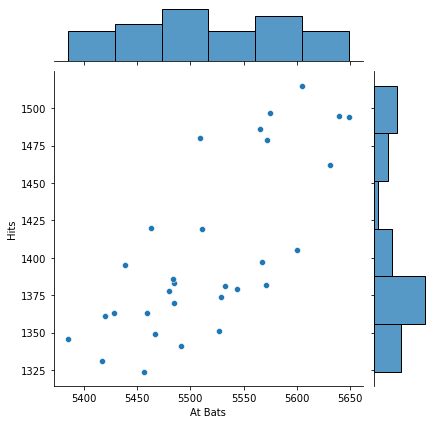

In [21]:
# Checking realtion between At Bats and Hits
sns.jointplot(x='At Bats',y='Hits',data=data)
plt.show()

In [22]:
# we have see the bat hits and number of hits are positively correlated

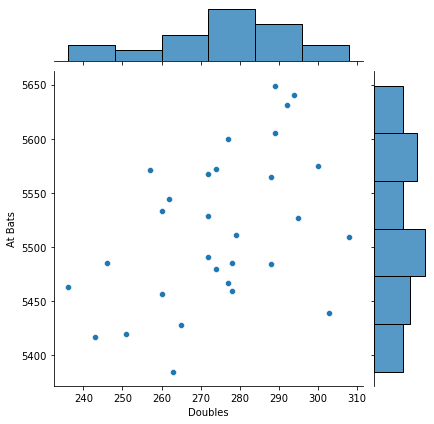

In [23]:
# Checking realtion between Doubles and At Bats

sns.jointplot(x='Doubles',y='At Bats',data=data)
plt.show()

In [24]:
# we have see the Doubles and number of At bats are positively correlated

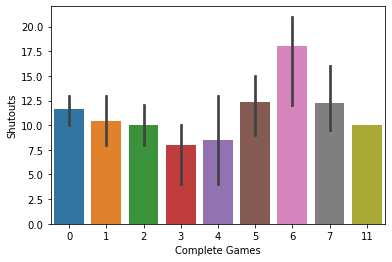

In [25]:
# Checking realtion between Complete Games and Shutouts

sns.barplot(x='Complete Games',y='Shutouts',data=data)
plt.show()

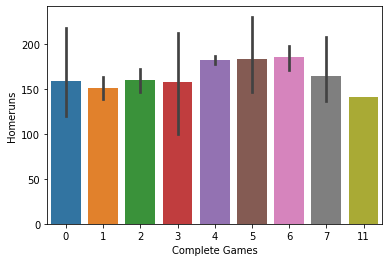

In [26]:
# Checking realtion between Complete Games and Homeruns

sns.barplot(x='Complete Games',y='Homeruns',data=data)
plt.show()

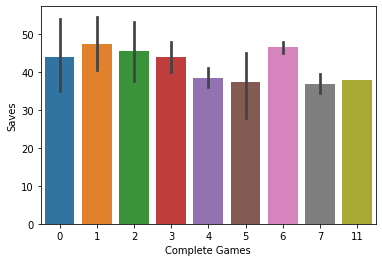

In [27]:
# Checking realtion between Complete Saves and Homeruns

sns.barplot(x='Complete Games',y='Saves',data=data)
plt.show()

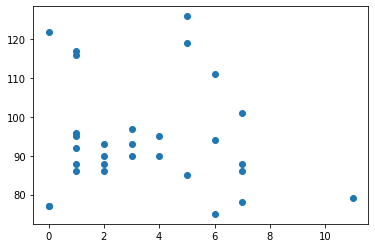

In [28]:
# Checking realtion between Complete Errors and Homeruns

plt.scatter(x='Complete Games',y='Errors',data=data)
plt.show()

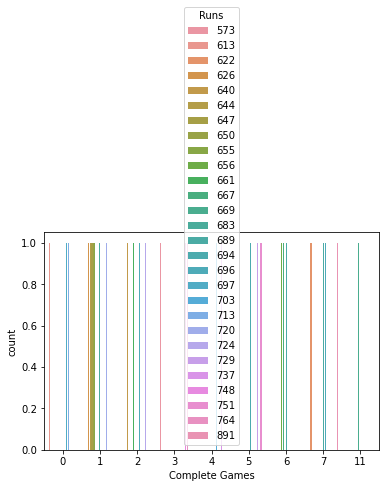

In [29]:
# Checking realtion between Complete Errors and Runs

sns.countplot(x='Complete Games',hue='Runs',data=data)
plt.show()

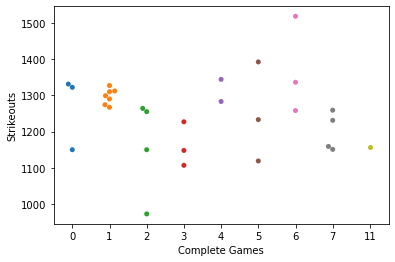

In [30]:
# Checking realtion between Strikeouts and Complete Games

sns.swarmplot(x='Complete Games',y='Strikeouts',data=data)
plt.show()

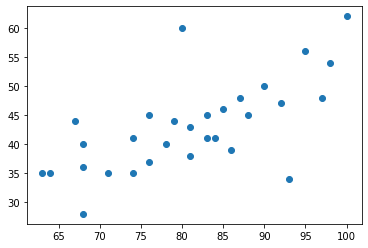

In [31]:
# Checking realtion between Win and Saves

plt.scatter(x='Win',y='Saves',data=data)
plt.show()

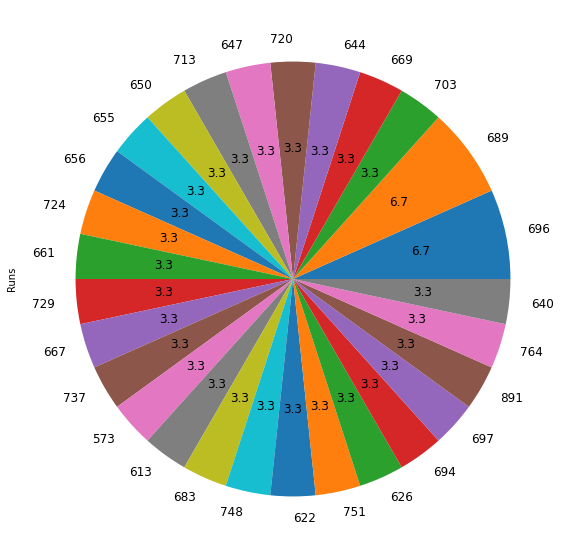

In [32]:
R = data['Runs'].value_counts()
# Visualise our data with pie
R.plot.pie( fontsize = 12, autopct = '%.1f',figsize = (10,10))
plt.show()

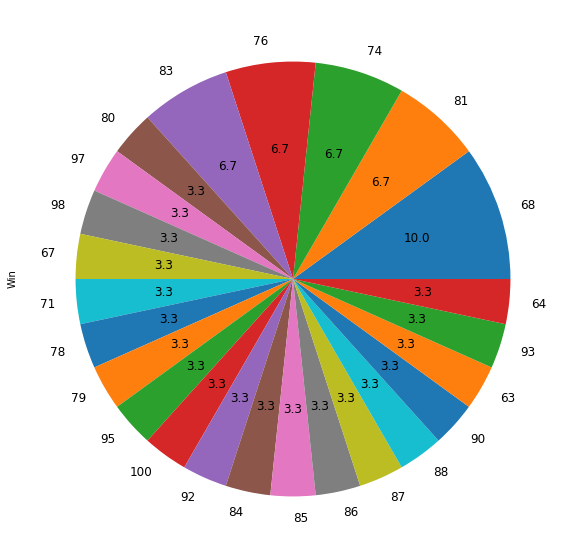

In [33]:
w = data['Win'].value_counts()
# Visualise our data with pie
w.plot.pie( fontsize = 12, autopct = '%.1f',figsize = (10,10))
plt.show()

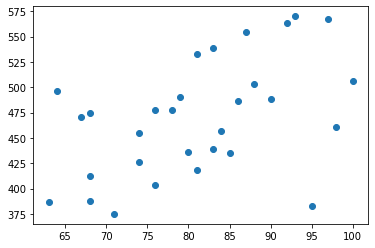

In [34]:
# Checking realtion between Walks and wins
plt.scatter(x= data['Win'],y= data['Walks'])
plt.show()

we see that Win  and walks are positive relationship

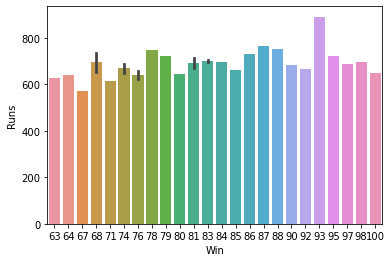

In [35]:
# Checking realtion between Walks and wins
sns.barplot(x= data['Win'],y= data['Runs'])
plt.show()

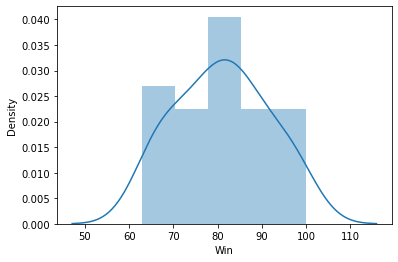

In [36]:
sns.distplot(data['Win'])
plt.show()

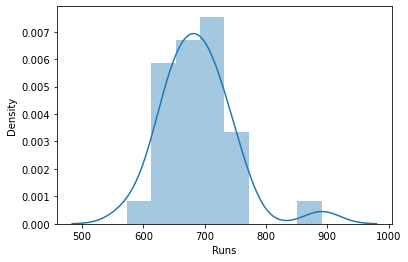

In [37]:
sns.distplot(data['Runs'])
plt.show()

In [38]:
#we  see that disturbuted normaly but some skeweness present in it

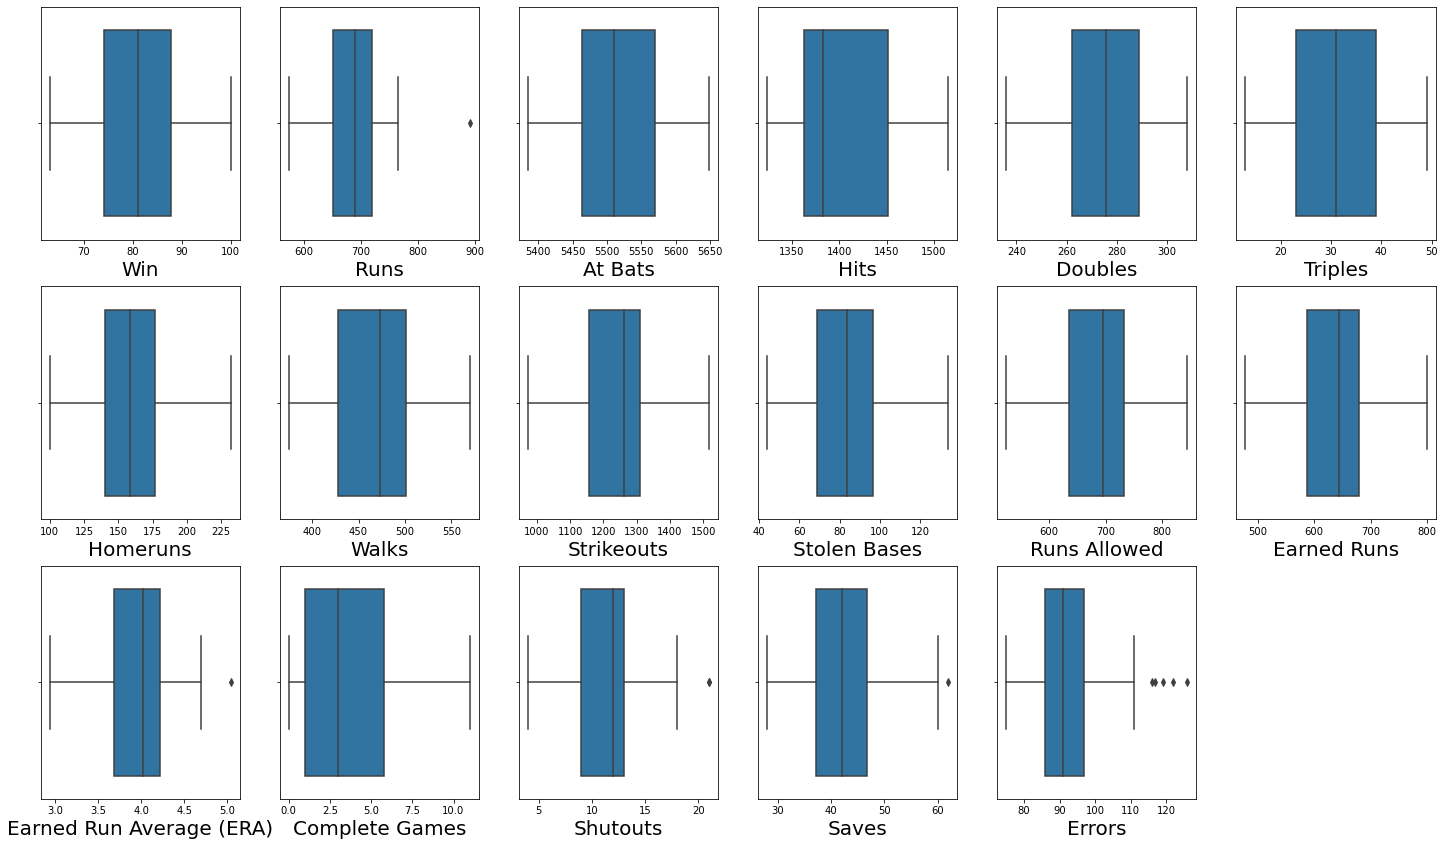

In [39]:
#Checking for outliers using box plot
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=30 :     # as there are 30 columns in the data
        ax = plt.subplot(6,6,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can see that a few outliers are present which we have to remove

In [40]:
data.skew()

Win                         0.047089
Runs                        1.200786
At Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Complete Games              0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

In [41]:
#Removing outliers using z score
from scipy.stats import zscore
z_score=np.abs(zscore(data))
print(np.where(z_score>3))

(array([5], dtype=int64), array([1], dtype=int64))


Only 1 outlier is present is data

In [42]:
threshold=3
new_data=data[(z_score<3).all(axis=1)]
print(data.shape)
print(new_data.shape)

(30, 17)
(29, 17)


In [43]:
#checking for how much data we lost
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


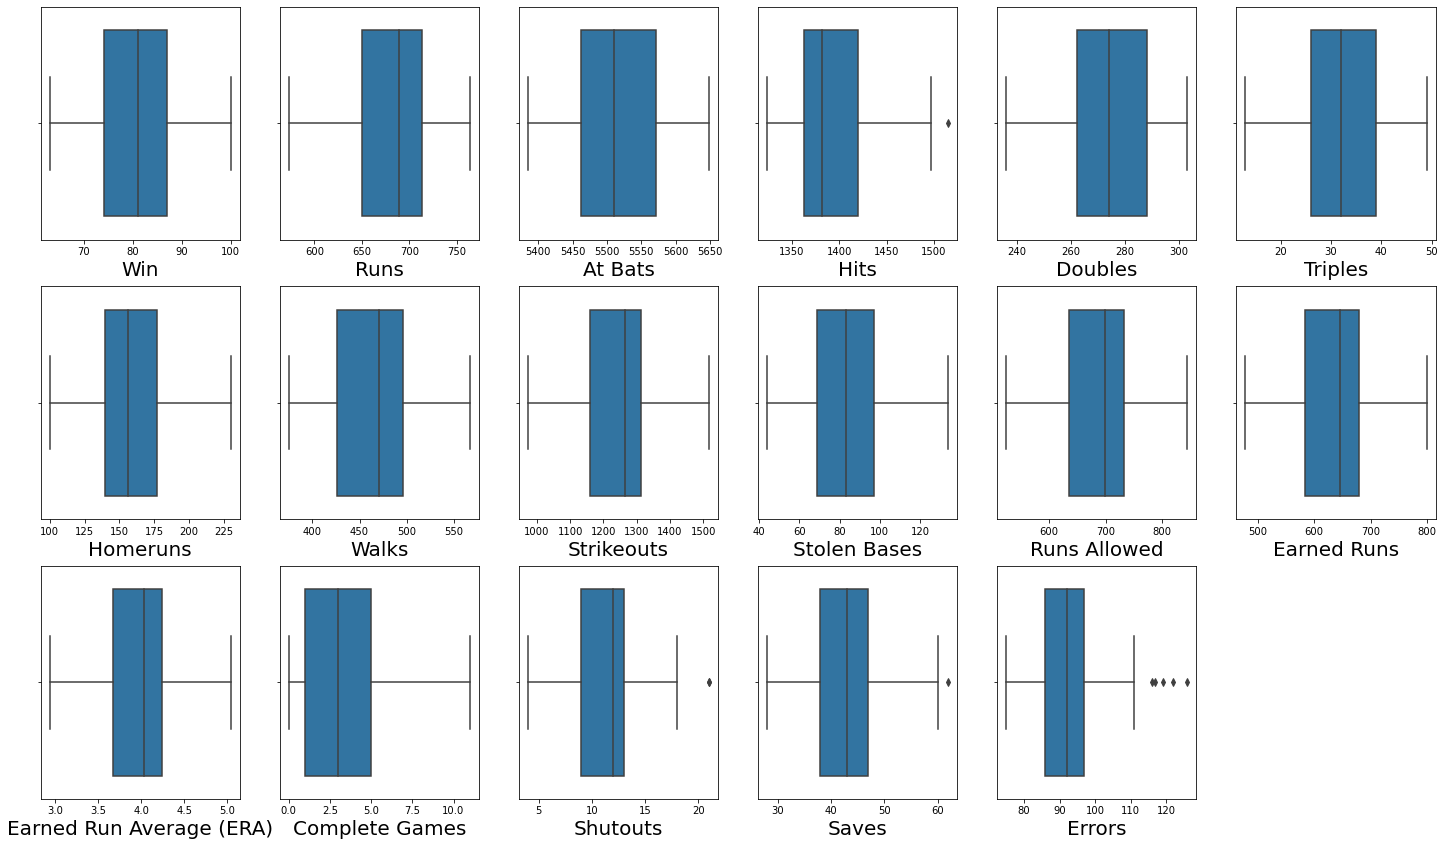

In [44]:
#Checking for outliers using box plot
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1

for column in new_data:
    if plotnumber<=30 :     # as there are 30 columns in the data
        ax = plt.subplot(6,6,plotnumber)
        sns.boxplot(new_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [45]:
new_data.skew()

Win                         0.119013
Runs                       -0.215364
At Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen Bases                0.494966
Runs Allowed                0.018155
Earned Runs                 0.018461
Earned Run Average (ERA)    0.016693
Complete Games              0.854980
Shutouts                    0.526943
Saves                       0.627480
Errors                      0.840271
dtype: float64

In [46]:
from sklearn.preprocessing import power_transform
new_baseball = power_transform(new_data)
new_baseball=pd.DataFrame(new_baseball,columns = new_data.columns)

In [47]:
# Again Checking skewness
new_baseball.skew()

Win                        -0.015560
Runs                       -0.024842
At Bats                     0.000000
Hits                        0.000000
Doubles                    -0.052793
Triples                    -0.075139
Homeruns                    0.000448
Walks                      -0.008572
Strikeouts                  0.051530
Stolen Bases               -0.009570
Runs Allowed               -0.011974
Earned Runs                -0.004988
Earned Run Average (ERA)   -0.000401
Complete Games             -0.045947
Shutouts                    0.000529
Saves                      -0.000925
Errors                      0.065585
dtype: float64

Now we see That skewness and outlier are removed

In [48]:
# Now we split dataset into feature and label
x=new_baseball.drop(columns='Win')
y=new_baseball['Win']

In [49]:
# Now we see that skewness is removed, and data is ready to fit and predict

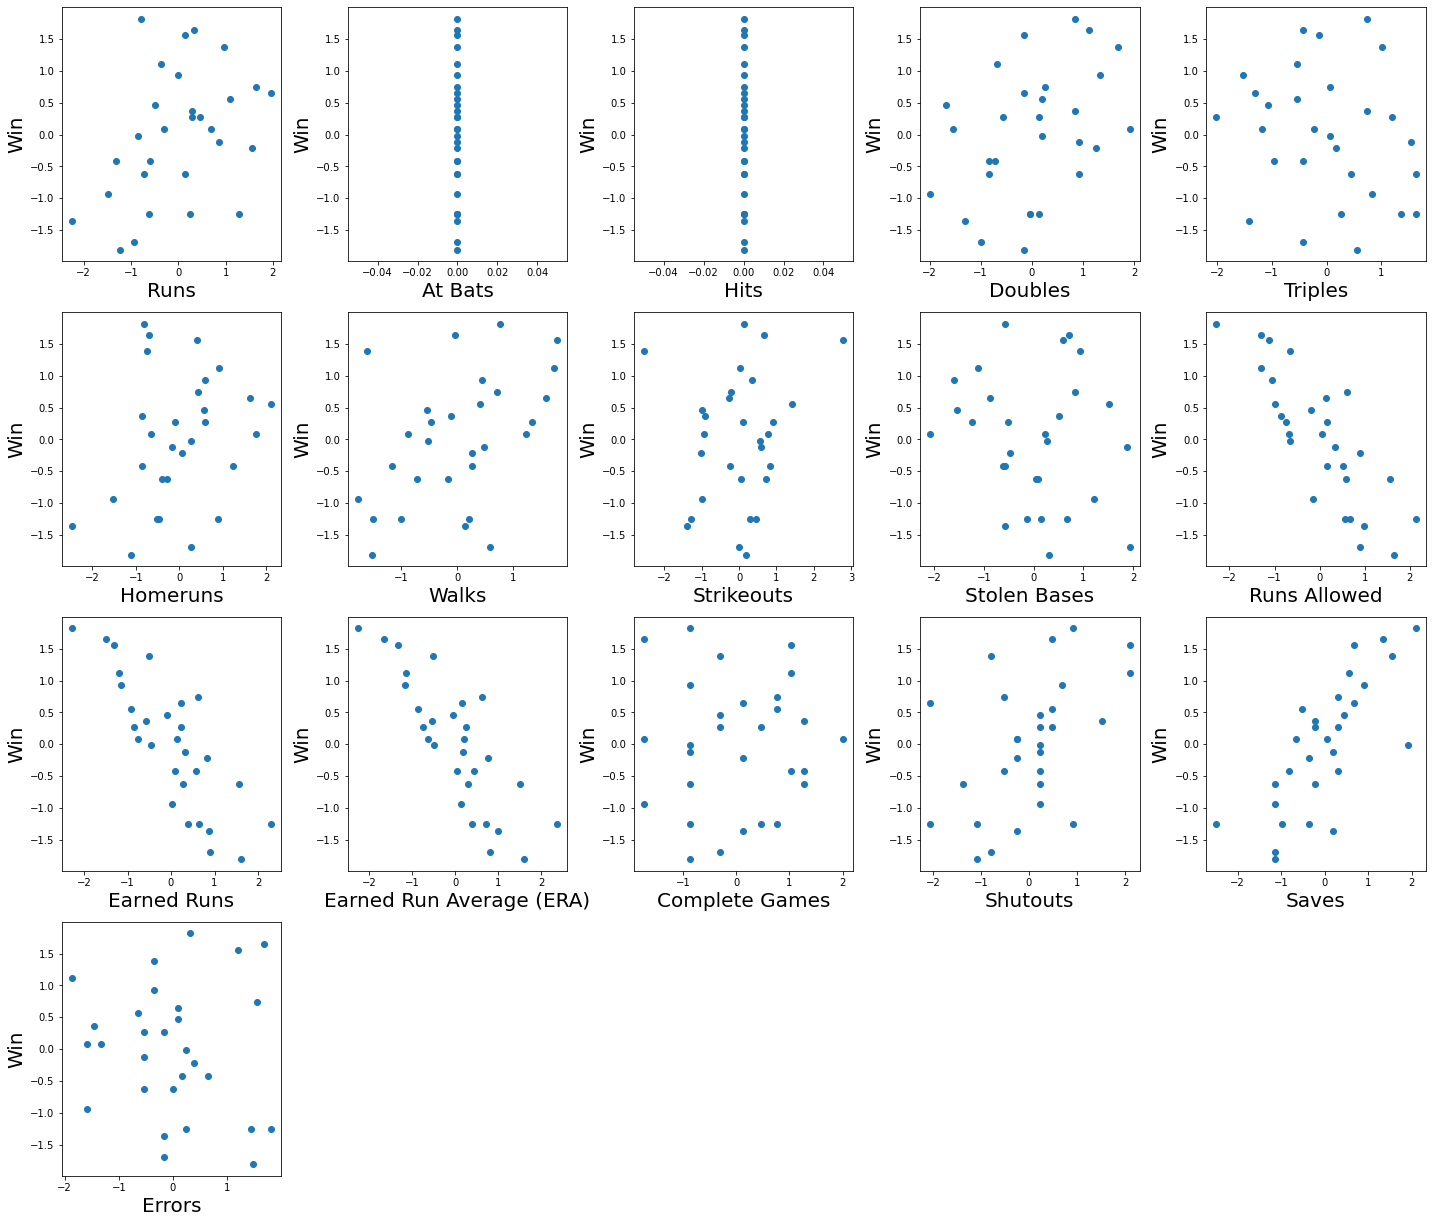

In [50]:
#Let's observe the relationship between independent variables and dependent variable.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=30 :
        ax = plt.subplot(6,5,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Win',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [51]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [52]:
# PCA is required for the analysis to reduce curse of Dimensionality
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)

array([[ 6.44170593e-02,  2.11569763e+00, -2.28698824e+00,
         1.18053189e+00, -2.62727393e+00, -5.76243524e-02,
         4.48346893e-01,  2.62947649e-01,  7.54377185e-01,
        -6.74740874e-01, -3.37129477e-01, -2.45272997e-02,
         8.12371877e-02, -3.00059029e-02, -4.62935046e-18,
        -5.86083255e-18],
       [ 3.57064839e-01,  3.00141607e-01, -3.30223897e-01,
         2.34276616e-01, -4.54811332e-01,  6.88753795e-01,
        -1.02624419e+00, -6.03370614e-01, -2.37812195e-01,
        -1.55580865e-01,  3.39347778e-01, -1.34186853e-01,
        -6.61618127e-03,  6.35554436e-03,  4.38375619e-16,
        -1.50382348e-17],
       [-1.14168483e+00,  7.36867842e-02, -1.65694267e+00,
        -2.32930825e+00, -1.12702606e+00, -5.45871337e-01,
         1.16347996e+00, -3.89945725e-01,  5.07150579e-01,
         1.19812940e+00,  3.73322272e-01,  1.68448540e-01,
        -2.72113566e-02, -3.02147597e-02,  8.87997714e-17,
         6.64035571e-17],
       [ 1.04884823e+00,  7.61572568e

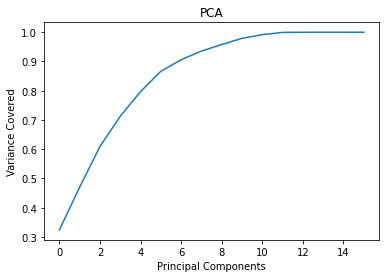

In [53]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

Around 11 Principal Components are able to explain > 95% variance. Its safe to consider strating 11 PC's

In [54]:
pca = PCA(n_components=11)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp = pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.064417,2.115698,-2.286988,1.180532,-2.627274,-0.057624,0.448347,0.262948,0.754377,-0.674741,-0.337129
1,0.357065,0.300142,-0.330224,0.234277,-0.454811,0.688754,-1.026244,-0.603371,-0.237812,-0.155581,0.339348
2,-1.141685,0.073687,-1.656943,-2.329308,-1.127026,-0.545871,1.163480,-0.389946,0.507151,1.198129,0.373322
3,1.048848,0.761573,1.140617,-1.095073,0.425372,-1.037661,-0.159963,0.189551,1.561945,0.081147,0.239791
4,2.596385,-0.734054,-1.429605,-1.476222,0.020805,0.402103,-0.932972,-1.146596,-0.255343,0.272046,-0.091025
5,-0.389650,-2.928449,0.469910,1.192291,-1.686744,-0.899580,1.154137,0.318692,-0.400127,-0.211516,0.857852
6,-0.347125,-1.338840,3.056539,1.252034,-1.342034,1.645125,-1.018382,0.216723,-0.223676,0.474776,-0.100882
7,-1.241831,1.062846,0.256923,1.476659,0.361880,0.208711,0.077875,-0.976897,0.364919,-0.554645,-0.351245
8,1.179995,-1.064781,-1.247315,0.109888,-1.311168,-0.887542,-0.520938,0.220153,-0.789855,0.215454,-0.416028
9,0.828681,-1.640091,-1.428797,0.637628,0.214315,-1.101706,0.452641,0.396597,-0.234902,-1.037574,-0.139797


In this data set we can see that there is linear/continuos data hence we use regression method to train and predict the variables

In [55]:
# To find the best random state using Linear Regressor model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0

maxR2_Score=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(princi_comp,y,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    score = r2_score(y_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.9389768216055733  on Random_state  1


In [56]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=.30,random_state=maxRS)

In [57]:
# Finding Best Algorithm
#importing all the required libraries to find best Algorithm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [58]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]


In [59]:
for m in model:
    print("*******************************************************************************")
    
    print('accuracy score of ->', m)
    
    m.fit(x_train,y_train)
    
    pred = m.predict(x_test)
    
    print("R2 Score:                ", r2_score(y_test,pred))
    
    print("Mean Absolute Error:     ", mean_absolute_error(y_test,pred))
    
    print("Mean Squared error:      ", mean_squared_error(y_test,pred))
    
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,pred)))
    
    score=cross_val_score(m,x,y,cv=5)
    
    print(score)
    
    print("cross validation score:  ", abs(score.mean()))
    
    print("Difference between R2 score and cross validatio score is -> ",r2_score(y_test,pred)-abs(score.mean()))
    
    print("--------------------------------**********************--------------------------------------")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.9389768216055733
Mean Absolute Error:      0.24483973898497424
Mean Squared error:       0.07986862412865053
Root Mean Squared Error:  0.2826103751256322
[ 0.62771033 -0.32417869  0.73270138  0.68617431  0.61155356]
cross validation score:   0.46679217667754125
Difference between R2 score and cross validatio score is ->  0.472184644928032
--------------------------------**********************--------------------------------------
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.7612882074934166
Mean Absolute Error:      0.44002670713354725
Mean Squared error:       0.31243181578568824
Root Mean Squared Error:  0.5589560052326912
[ 0.21933434 -5.47947232  0.4837502   0.34139509  0.87714195]
cross validation score:   0.7115701480020642
Diff

In [60]:
#We see that RandomForestRegressor give  76% accuracy and least difference

In [61]:
# Let's Use GridSearchCV for the best parameter to improve the accuracy

In [71]:
params={'bootstrap': [True],
        'max_depth': [80, 90, 100, 110],
        'min_samples_leaf': [3, 4, 5],
        'min_samples_split': [8, 10, 12],
        'n_estimators': [100, 200, 300, 1000]}

In [72]:
gridsearch = GridSearchCV(RandomForestRegressor(), param_grid=params,cv = 3, n_jobs = -1)

In [73]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [75]:
gridsearch.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [79]:
# we will use the best parameters in our rfr algorithm and check if accuracy is increasing.
rfr=gridsearch.best_estimator_

In [80]:
rfr.fit(x_train,y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200)

In [83]:
rfr.score(x_test,y_test)

0.6619071492890225

In [86]:
y_pred =rfr.predict(x_test)
accuracy = r2_score(y_test,y_pred)
print(accuracy)

0.6619071492890225


In [ ]:
#hyperparameter tuning give 66 % accuracy

In [87]:
#Saving the model
import joblib 
joblib.dump(rf,"baseball_case_study.pkl")

['baseball_case_study.pkl']